In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
 

# Tenemos la siguiente pregunta, un grupo de sociologos reunieron datos para ver 
# si las clases sen linea son malas o buenas, tomando como métrica un examen
# Puedo ver el promedio de los examenes y usarlo como métrica definitoria
data = pd.read_csv("online_classroom.csv")
online = data.query("format_ol==1")["falsexam"]
face_to_face = data.query("format_ol==0 & format_blended==0")["falsexam"]


In [54]:
# Promedio y longitud presencial
(face_to_face.mean(), len(face_to_face))

(78.54748458333333, 120)

In [55]:
# Promedio y tamaño online
(online.mean(),len(online))

(73.63526308510637, 94)

Diferencia entre los promedios, ¿esto es confiable?

In [56]:
face_to_face.mean()-online.mean()

4.912221498226955

La verdad es que no tengo muchos datos, recolectar más muchas veces es complicado y costoso. Necesito una conclusión.

**La diferencia promedio entre online y presencial es significativa, si o no ***

¿Cómo le puedo hacer?

### Teorema central del límite

Los promedios siguen una distribución normal

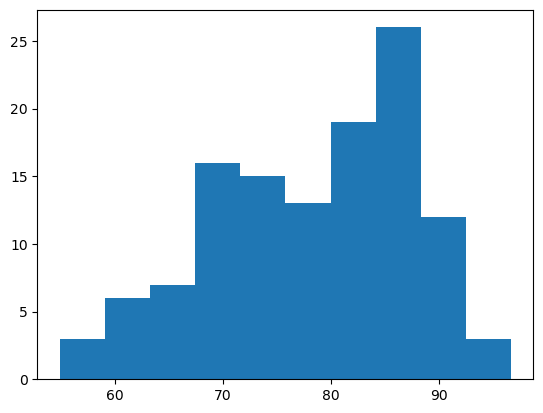

In [57]:
## Ejemplo, face to face no es normal
plt.hist(face_to_face)
plt.show()

Pero si lo resampleo y tomo sus promedios si sería normal

In [58]:
promedios = []
for i in range(1000):
    promedios.append(face_to_face.sample(len(face_to_face),replace=True).mean())
promedios

[79.78165358333332,
 78.08599408333333,
 79.20099408333334,
 80.27032758333331,
 79.28289983333335,
 78.53656916666667,
 79.76489175,
 78.33906941666667,
 79.60549383333333,
 78.154124,
 78.79690641666667,
 78.94649291666666,
 77.9357255,
 77.65439058333332,
 78.83349249999999,
 77.61497549999999,
 77.84090808333332,
 77.85039991666666,
 79.10129825,
 78.98714999999999,
 78.24048133333334,
 78.22139825000001,
 78.78096058333334,
 79.27006916666667,
 78.96289275,
 77.24390983333333,
 78.29971749999999,
 78.75390125,
 79.00481833333333,
 76.92339283333334,
 75.61098224999999,
 78.14223625000001,
 78.8625675,
 77.95956008333333,
 78.26957608333332,
 78.54420758333332,
 77.93856858333332,
 78.69515841666667,
 78.06171850000001,
 79.25664458333334,
 78.81397583333334,
 79.150242,
 76.64707766666668,
 77.53208025,
 77.93281058333334,
 79.3014,
 79.0747325,
 78.01839916666667,
 78.1001605,
 79.7566615,
 78.03514075,
 78.35299433333333,
 78.96565133333334,
 76.99181608333333,
 78.41765,
 79.84

Los promedios mágicamente siguen una distribución normal

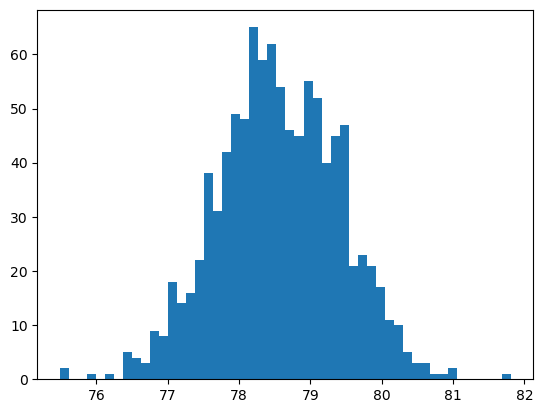

In [59]:
plt.hist(promedios,bins=50)
plt.show()

### Error estandard

El error estandard sería la desviación estandard de los promedios posibles


Si $X$ son $n$ observaciones independientes con una media $\mu$ y una varianza $\sigma^2$

$T = (X_1 + X_2 + X_3 + ... + X_n)$

$Var(T) = n\sigma^2$

$Var(\frac{T}{n}) = Var(\frac{1}{n} * T) = \frac{1}{n^2} * Var(T) = \frac{1}{n^2} * n\sigma^2  = \frac{\sigma^2}{n}$

Ojo: la varianza de $\frac{T}{n}$ es la varianza de los promedios


La desviación estandard de lo anterior sería:

$Sd(\frac{T}{n}) = \frac{\sigma}{\sqrt{n}}$

In [60]:
### Error estandard de face to face
face_to_face.std()/np.sqrt(len(face_to_face))

0.8723511456319104

In [61]:
# La desvición estandard de nuestra simulación debe ser muy similar
np.std(promedios)

0.85500965334276

In [62]:
# Si usamos pandas
face_to_face.sem()

0.8723511456319104

### Explicar que es el error estandard

Tenemos una muestra de datos la cual pertenece a una muestra mayor la cual no conocemos.

Los promeddios posibles de esa muestra hipotetica de datos siguen una _distribución normal_ por el teorema central del límite  

Matemáticamente sabemos que la desviación estandard de ese promedio desconocido es el error estandard



#### Aplicando el error estandard

Si los promedios de mis datos siguen una distribución normal, puedo sacar algunas conclusiones interesantes. 

Sabemos que dentro de una distribución normal
- 1 desviación estandard estan 66% de los datos
- 2 desviaciones estandard están 95% de los datos
- 3 desviaciones estandard estan 99% de los datos





In [63]:
# Error estandard de las variables en cuestión


### Intervalo de confianza

Dame el intervalo de confianza al 95% del promedio de clases en linea y presencial


In [64]:
(online.mean()-2*online.sem(),online.mean()+2*online.sem())

(70.56094429049804, 76.7095818797147)

In [65]:
(face_to_face.mean()-2*face_to_face.sem(),face_to_face.mean()+2*face_to_face.sem())

(76.80278229206951, 80.29218687459715)

### Prueba de hipotesis

Al sumar dos variables normaes:

$N(\mu_1, \sigma^2_1) + N(\mu_2, \sigma^2_2)  = N(\mu_1 + \mu_2, \sigma^2_1 + \sigma^2_2)$ 

Y al restar
$N(\mu_1, \sigma^2_1) - N(\mu_2, \sigma^2_2)  = N(\mu_1 - \mu_2, \sigma^2_1 + \sigma^2_2)$ 

Si no me creen:

histtype='step'

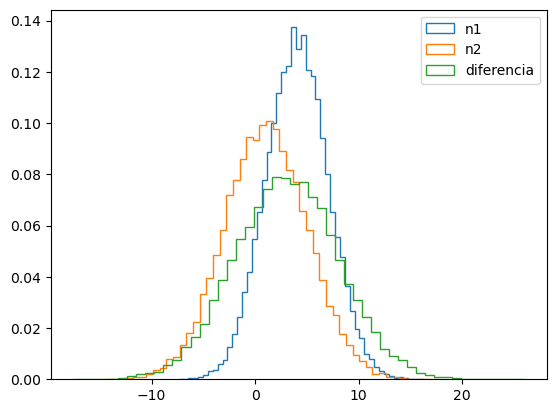

In [66]:
np.random.seed(123)
df_normals = pd.DataFrame({
    'n1': np.random.normal(4, 3, 30000),
    'n2': np.random.normal(1, 4, 30000)
})
df_normals['difference'] = df_normals.n1 -df_normals.n2

plt.hist(df_normals.n1, histtype = 'step', density = True, label="n1", bins=50)
plt.hist(df_normals.n2, histtype = 'step', density = True, label="n2", bins=50)
plt.hist(df_normals.difference, histtype = 'step', density = True, label="diferencia", bins=50)
plt.legend()
plt.show()




En este caso, sabemos que *los promedios* tienen una distribución normal 

En este momento yo tengo dos promedios con sus respectivas desviaciones estandard, quiere decir que puedo combinar la distribución de las clases online y presencial. 

Al hacer esta combinación podría sacar estadísticas interesantes.

¿Las diferencias entre online y presencial como se ven? ¿Cuál es su distribución ¿Eso me puede ayudar a determinar que es mejor?


$\mu_{diff} = \mu_1 - \mu_2 $

$SE_{diff} = \sqrt{SE^2_1 + SE^2_2}$

In [67]:
### Mu diff
mu_diff = online.mean() - face_to_face.mean()
## SE diff
se_diff = np.sqrt((online.var()/len(online))+ face_to_face.var()/len(face_to_face))
# CI
print(f"Intervalo de confianza del efecto causal {mu_diff-2*se_diff} y {mu_diff+2*se_diff}")

Intervalo de confianza del efecto causal -8.44710793714168 y -1.3773350593122302


stats.norm.pdf
plt.vlines

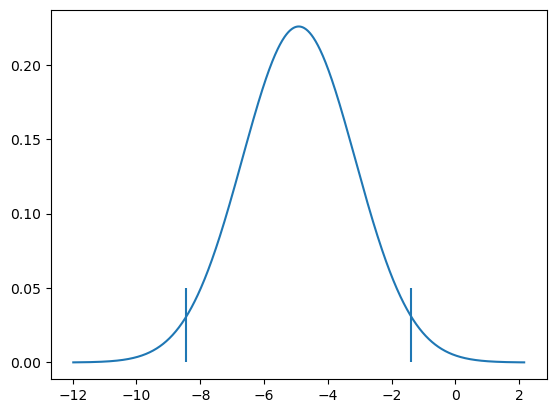

In [68]:
## Visualizando 
x = np.linspace(mu_diff-4*se_diff, mu_diff +4*se_diff,1000)
y = stats.norm.pdf(x, mu_diff, se_diff)
plt.vlines(mu_diff-2*se_diff, ymin=0, ymax=0.05)
plt.vlines(mu_diff+2*se_diff, ymin=0, ymax=0.05)
plt.plot(x,y)

Con esto en mano, podemos decir que hay un 95% de confianza de que la verdadera diferencia en medias de online y clases presenciales este entre -8.37 y -1.44



#### Repasando: estadístico Z
Si X es una variable aleatoria normalmente distribuida y $X ~ N(μ, σ)$, entonces la puntuación z para una determinada $x$ es:

$z = \frac{x - \mu}{\sigma}$


Como han visto en sus otras clases, hacer algo "normal estandard" es simplemente escalar sus datos a que tengan media 0 y varianza 1




#### Adaptnado esto al problema

Podría transformar las diferencias entre online y presencial a una distribución nor,al estandard, _asumiendo que la diferencia real es 0_ (lingo estadístico: la hipotesis nula $H_0$=0).

Al hacer esto, puedo ver que tan extremo se ve esta diferencia en la distribución normal estandard, si da muy extremo entonces seria raro y podemos calcular la probabilidad de que sea azar.

- $x$ serían las diferencias 
- $\mu$ sería 0, ya que quiero ve tan probable es esto
- $\sigma$ sería el error estandard de las diferencias 

De esto:

$z = \frac{x - \mu}{\sigma}$

Pasamos a esto:


$z = \frac{\mu_{diff} - H_0}{SE_{diff}}$

Dado que mi hipotesis es que los promedios _no varían_, $H_0 = 0$ 

$z = \frac{\mu_{diff}}{SE_{diff}}$




In [69]:
# Calcula el estadístico Z
z = mu_diff / se_diff
z

-2.7792810791031224

En una distribución normal estandard, este resultado Z es bastante extremo no parece ser resultado de azar

stats.norm.cdf

In [70]:
# Obten el p value
stats.norm.cdf(z)

0.0027239680835563383

In [71]:
## Probabilidad de que las diferencias entre desempeños sean producto del azar


In [78]:
## Crea un código base para el AB test
def AB_test(test, control):
    # Mu
    mu_test = test.mean()
    mu_control = control.mean()

    # SE
    se_test = test.sem()
    se_control = control.sem()

    # Differences
    mu_diff = mu_control - mu_test
    se_diff = np.sqrt((test.var()/len(test))+(control.var()/len(control)))

    # Z score and p value 
    z = mu_diff / se_diff

    p_value = stats.norm.cdf(z)

    print(f"Variable test entre {mu_test-2*se_test} y {mu_test+2*se_test}")
    print(f"Variable control entre {mu_control-2*se_control} y {mu_control+2*se_control}")
    print(f"Z score {z}")
    print(f"P value {p_value}")
    return

    
AB_test(face_to_face, online)

Variable test entre 76.80278229206951 y 80.29218687459715
Variable control entre 70.56094429049804 y 76.7095818797147
Z score -2.7792810791031224
P value 0.0027239680835563383


In [90]:
df = pd.read_csv('housing.csv')

df['aleatorio'] = np.random.rand(len(df))
df['prueba'] = df.aleatorio > 0.7

In [92]:
test = df.query("prueba ==  True").median_house_value
control = df.query("prueba == False").median_house_value
AB_test(test=test, control=control)

Variable test entre 203290.05823109933 y 209202.24026185158
Variable control entre 205202.20002339117 y 209029.4779087396
Z score 0.49394084710426384
P value 0.6893260220737354


In [80]:
df.groupby('ocean_proximity').mean()['median_house_value']

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

In [87]:
test = df.query("ocean_proximity == 'NEAR OCEAN'").median_house_value
control = df.query("ocean_proximity != 'NEAR OCEAN'").median_house_value
AB_test(test=test, control=control)

Variable test entre 244682.73090303407 y 254185.22395023904
Variable control entre 198877.3701074881 y 202246.92630003052
Z score -19.389301036692324
P value 4.750966203782364e-84


In [85]:
df['high_income'] = df.median_income >4.7

In [86]:
test = df.query("high_income == True").median_house_value
control = df.query("high_income == False").median_house_value
AB_test(test=test, control=control)

Variable test entre 311995.8565808251 y 318152.46676569834
Variable control entre 167944.4573581927 y 170854.9276284374
Z score -85.56633760434255
P value 0.0
